**Installing the required dependencies:**

In [13]:
!pip install pandas numpy scikit-learn matplotlib seaborn scipy
!pip install xgboost lightgbm catboost
!pip install flask fastapi uvicorn
!pip install joblib


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: C:\Users\KIIT\Desktop\PriceOptima\env\Scripts\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: C:\Users\KIIT\Desktop\PriceOptima\env\Scripts\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: C:\Users\KIIT\Desktop\PriceOptima\env\Scripts\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: C:\Users\KIIT\Desktop\PriceOptima\env\Scripts\python.exe -m pip install --upgrade pip


# **Milestone 1: Requirements & Data Preparation**

**Objective:**
Importing libraries and collecting datasets.

Dataset: https://www.kaggle.com/datasets/arashnic/dynamic-pricing-dataset/data

In [14]:
#required libraries
import pandas as pd
import numpy as np

In [15]:
#reading the raw dataset
df = pd.read_csv(r"dynamic_pricing.csv")

In [16]:
#reading first 10 rows
df.head(10)

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422
5,59,35,Urban,Silver,83,3.51,Night,Economy,128,339.955361
6,93,43,Suburban,Regular,44,4.41,Afternoon,Premium,16,104.061541
7,62,39,Rural,Gold,83,3.59,Afternoon,Premium,47,235.811864
8,79,14,Rural,Silver,71,3.74,Evening,Economy,128,501.412517
9,42,6,Rural,Silver,21,3.85,Night,Premium,128,398.993365


In [17]:
#reading last 10 rows
df.tail(10)

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
990,54,39,Rural,Gold,88,4.59,Evening,Economy,42,147.426387
991,95,24,Suburban,Gold,79,3.50,Afternoon,Economy,130,552.230443
992,63,31,Suburban,Silver,2,3.81,Evening,Premium,160,632.560142
993,43,18,Urban,Gold,58,4.22,Evening,Economy,156,494.745257
994,33,14,Suburban,Regular,87,4.81,Evening,Premium,17,118.986533
995,33,23,Urban,Gold,24,4.21,Morning,Premium,11,91.389526
996,84,29,Urban,Regular,92,4.55,Morning,Premium,94,424.155987
997,44,6,Suburban,Gold,80,4.13,Night,Premium,40,157.364830
998,53,27,Suburban,Regular,78,3.63,Night,Premium,58,279.095048
999,78,63,Rural,Gold,14,4.21,Afternoon,Economy,147,655.065106


In [18]:
#to check the size of the data
df.shape

(1000, 10)

# **Milestone 3: Exploratory Data Analysis (EDA)**

**Objective**: Identify demand elasticity and customer segmentation.

**Data Cleaning and Data Preprocessing:**

In [19]:
#checking for the basic dataset information with null/non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


In [20]:
#checking for number of numerical and categorical columns
num_features = df.select_dtypes(include='number').shape[1]
cat_features = df.select_dtypes(include=['object', 'category']).shape[1]
print("Numerical features:", num_features)
print("Categorical features:", cat_features)

Numerical features: 6
Categorical features: 4


In [21]:
#checking for basic datatypes of features
df.dtypes

Number_of_Riders             int64
Number_of_Drivers            int64
Location_Category           object
Customer_Loyalty_Status     object
Number_of_Past_Rides         int64
Average_Ratings            float64
Time_of_Booking             object
Vehicle_Type                object
Expected_Ride_Duration       int64
Historical_Cost_of_Ride    float64
dtype: object

In [22]:
#to check for null values
df.isnull().sum()

Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

In [23]:
#to check for duplicates
df.duplicated().sum()

np.int64(0)

In [24]:
#prints all unique values from categorical cols
for col in df.select_dtypes(include=['object', 'category']):
    print(col, ":", df[col].unique())

Location_Category : ['Urban' 'Suburban' 'Rural']
Customer_Loyalty_Status : ['Silver' 'Regular' 'Gold']
Time_of_Booking : ['Night' 'Evening' 'Afternoon' 'Morning']
Vehicle_Type : ['Premium' 'Economy']


In [25]:
#stats including categorical cols as well
df.describe(include='all')

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000,1000,1000.000000,1000.000000,1000,1000,1000.00000,1000.000000
unique,NaN,NaN,3,3,NaN,NaN,4,2,NaN,NaN
top,NaN,NaN,Urban,Silver,NaN,NaN,Night,Premium,NaN,NaN
freq,NaN,NaN,346,367,NaN,NaN,276,522,NaN,NaN
mean,60.372000,27.076000,NaN,NaN,50.031000,4.257220,NaN,NaN,99.58800,372.502623
std,23.701506,19.068346,NaN,NaN,29.313774,0.435781,NaN,NaN,49.16545,187.158756
min,20.000000,5.000000,NaN,NaN,0.000000,3.500000,NaN,NaN,10.00000,25.993449
25%,40.000000,11.000000,NaN,NaN,25.000000,3.870000,NaN,NaN,59.75000,221.365202
50%,60.000000,22.000000,NaN,NaN,51.000000,4.270000,NaN,NaN,102.00000,362.019426
75%,81.000000,38.000000,NaN,NaN,75.000000,4.632500,NaN,NaN,143.00000,510.497504


**Data visualization and handling outliers:**

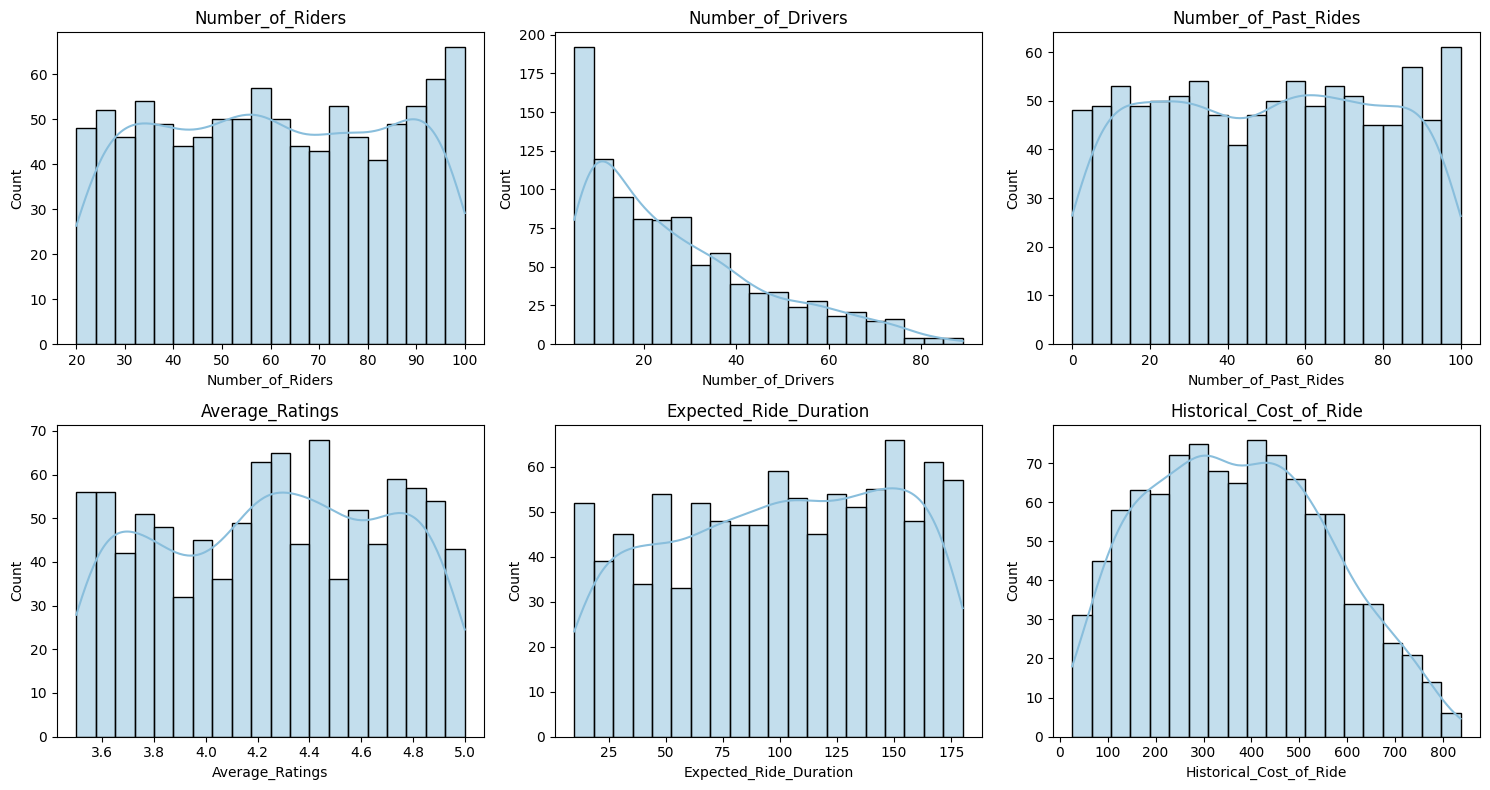

C:\Users\KIIT\AppData\Local\Temp\ipykernel_34680\2064428930.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette=cat_palette, ax=ax)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_34680\2064428930.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette=cat_palette, ax=ax)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_34680\2064428930.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette=cat_palette, ax=ax)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_34680\2064428930.py:26: Fut

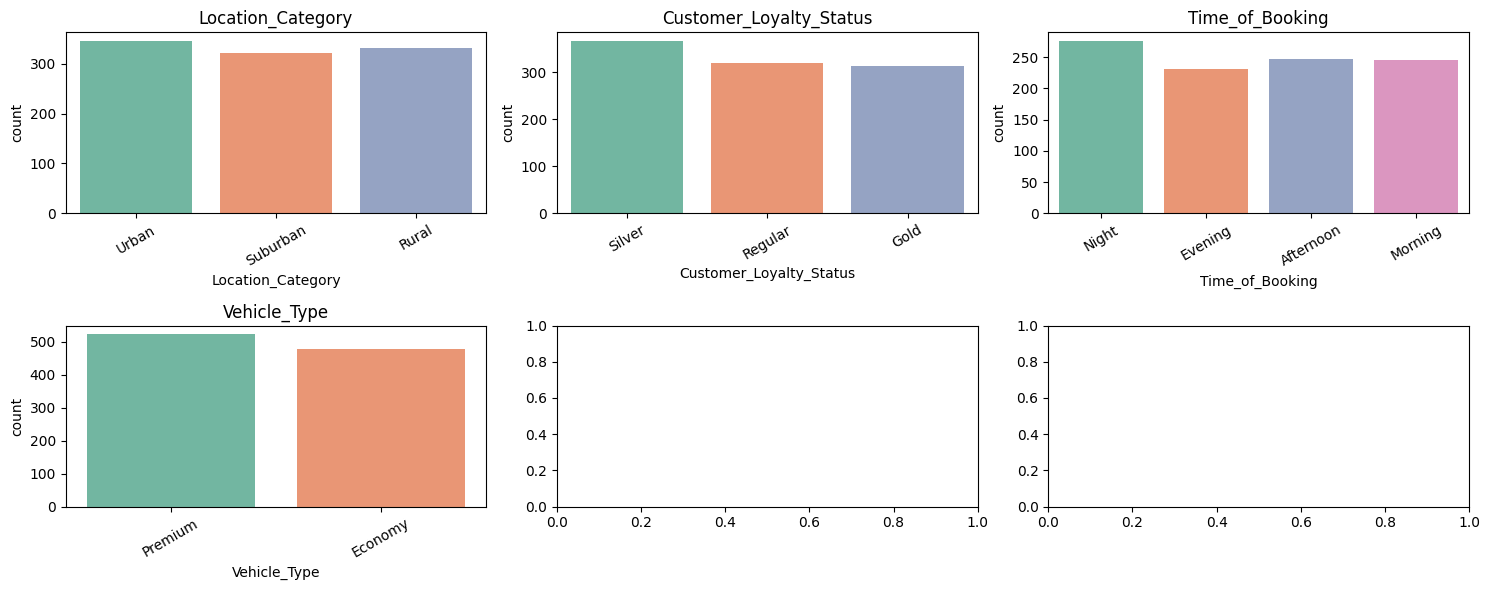

In [26]:
#histograms of numeric variables (distributions, skewness, etc.)
#count plots for categorical variables (freq of each category)
import matplotlib.pyplot as plt
import seaborn as sns

num_palette = "Blues"    
cat_palette = "Set2"     

numeric_cols = [
    'Number_of_Riders','Number_of_Drivers','Number_of_Past_Rides',
    'Average_Ratings','Expected_Ride_Duration','Historical_Cost_of_Ride'
]
categorical_cols = [
    'Location_Category','Customer_Loyalty_Status',
    'Time_of_Booking','Vehicle_Type'
]

fig, axes = plt.subplots((len(numeric_cols)+2)//3, 3, figsize=(15,8))
for ax, col in zip(axes.flatten(), numeric_cols):
    sns.histplot(df[col], kde=True, bins=20, color=sns.color_palette(num_palette)[2], ax=ax)
    ax.set_title(col)
plt.tight_layout(); plt.show()

fig, axes = plt.subplots((len(categorical_cols)+2)//3, 3, figsize=(15,6))
for ax, col in zip(axes.flatten(), categorical_cols):
    sns.countplot(x=col, data=df, palette=cat_palette, ax=ax)
    ax.set_title(col); ax.tick_params(axis="x", rotation=30)
plt.tight_layout(); plt.show()


Number_of_Riders: 0 outliers
Number_of_Drivers: 10 outliers
Number_of_Past_Rides: 0 outliers
Average_Ratings: 0 outliers
Expected_Ride_Duration: 0 outliers
Historical_Cost_of_Ride: 0 outliers


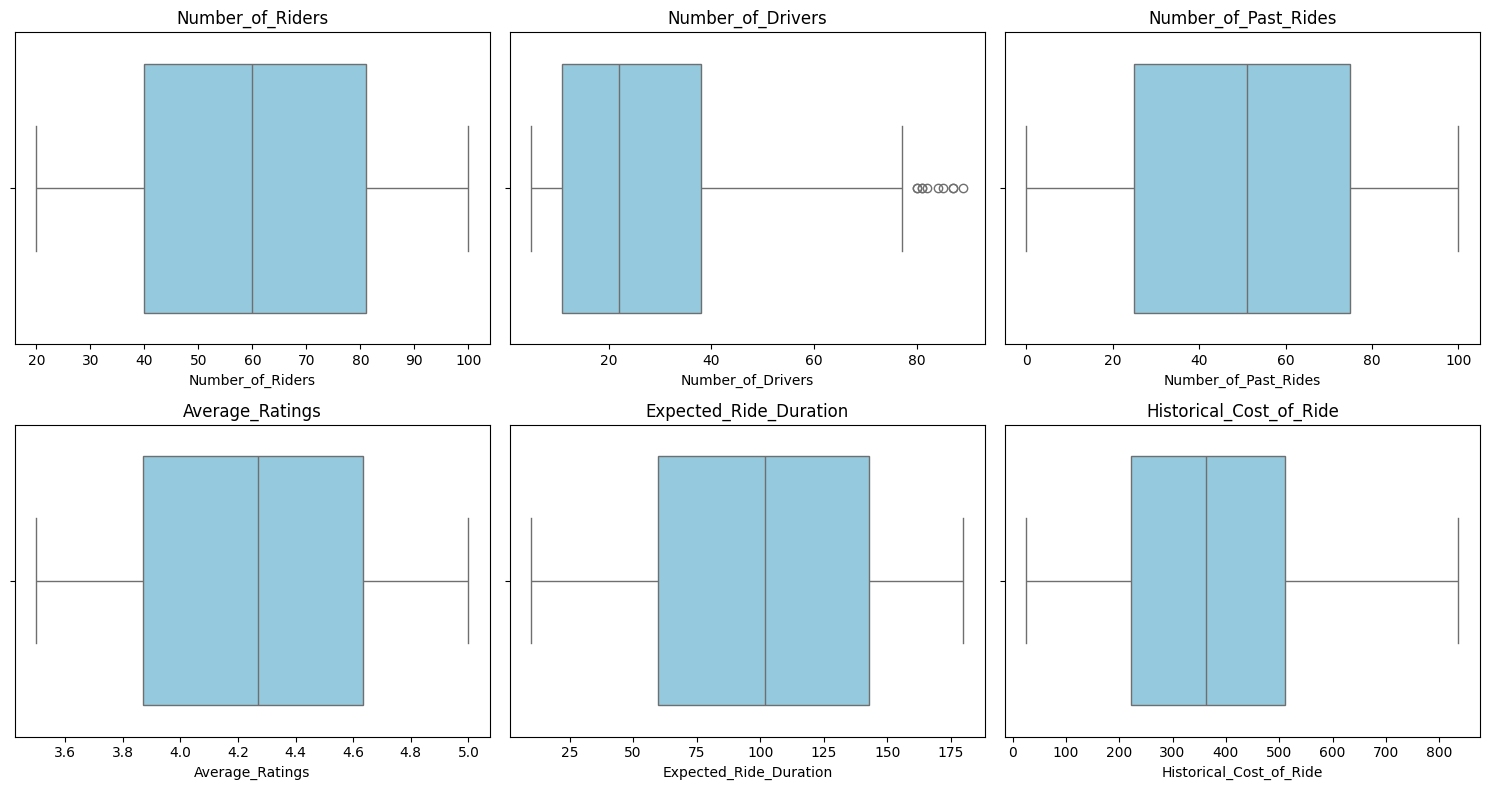

In [27]:
#checking out for outliers using IQR for numerical cols
for col in numeric_cols:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

#visualizing for outliers
fig, axes = plt.subplots((len(numeric_cols)+2)//3, 3, figsize=(15,8))
for ax, col in zip(axes.flatten(), numeric_cols):
    sns.boxplot(x=df[col], ax=ax, color="skyblue")
    ax.set_title(col)
plt.tight_layout(); plt.show()

Lower bound: -29.5, Upper bound: 78.5


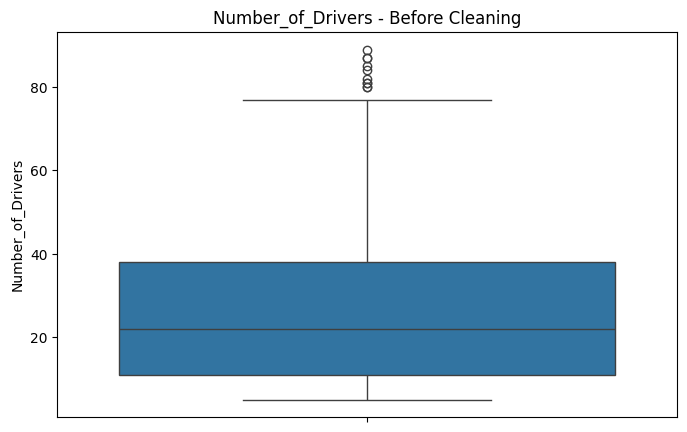

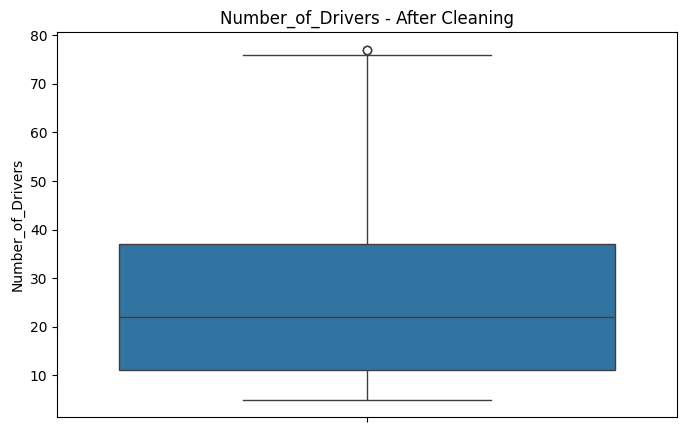

Rows before cleaning: 1000, Rows after cleaning: 990


In [28]:
#handling outliers for numerical cols 
Q1 = df['Number_of_Drivers'].quantile(0.25)
Q3 = df['Number_of_Drivers'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

plt.figure(figsize=(8,5))
sns.boxplot(y=df['Number_of_Drivers'])
plt.title('Number_of_Drivers - Before Cleaning')
plt.show()

df_cleaned = df[(df['Number_of_Drivers'] >= lower_bound) & (df['Number_of_Drivers'] <= upper_bound)]

plt.figure(figsize=(8,5))
sns.boxplot(y=df_cleaned['Number_of_Drivers'])
plt.title('Number_of_Drivers - After Cleaning')
plt.show()

print(f"Rows before cleaning: {len(df)}, Rows after cleaning: {len(df_cleaned)}")

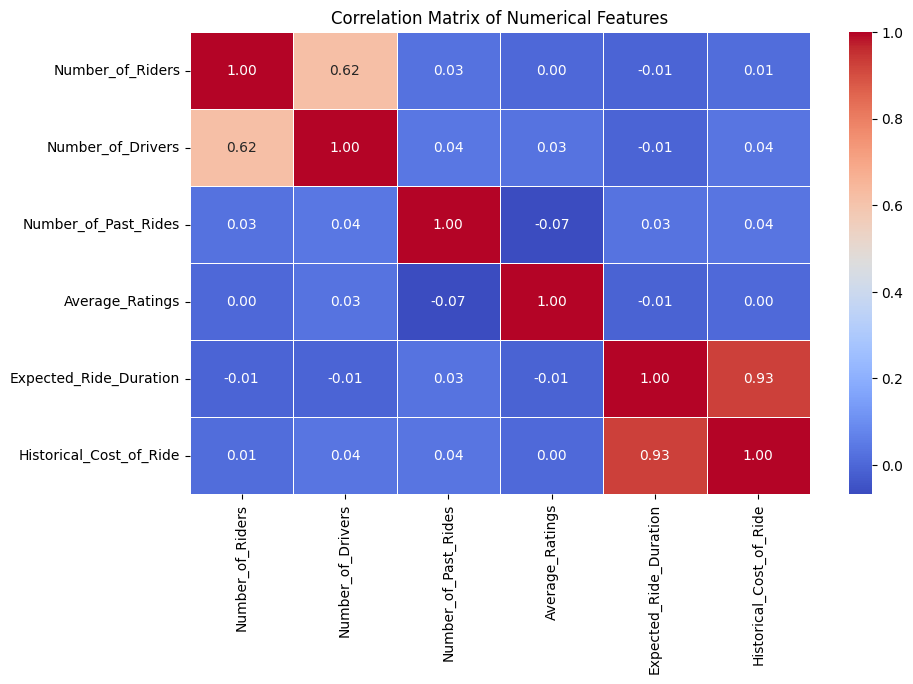

In [29]:
#correlation heatmap of the independent features with the target variable
corr_matrix = df_cleaned[numeric_cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

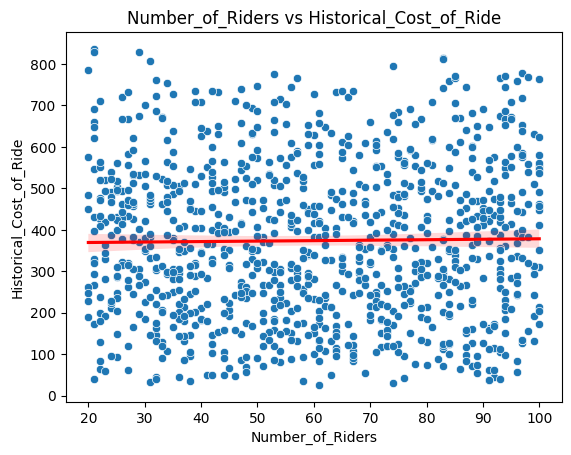

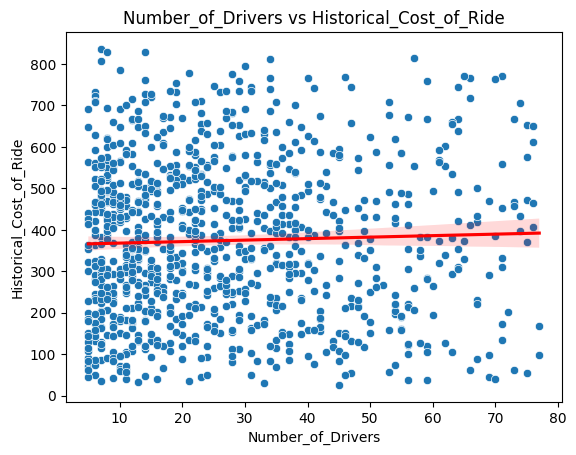

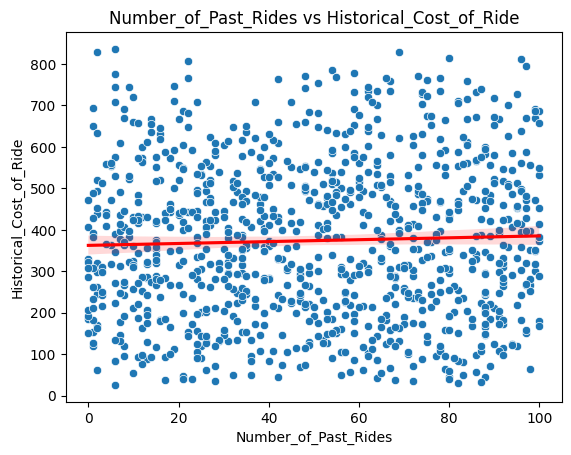

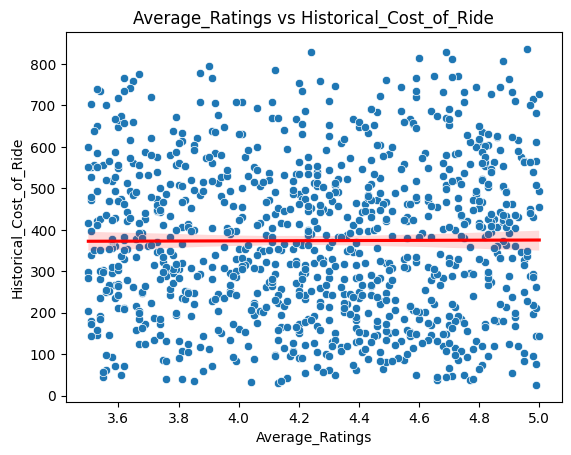

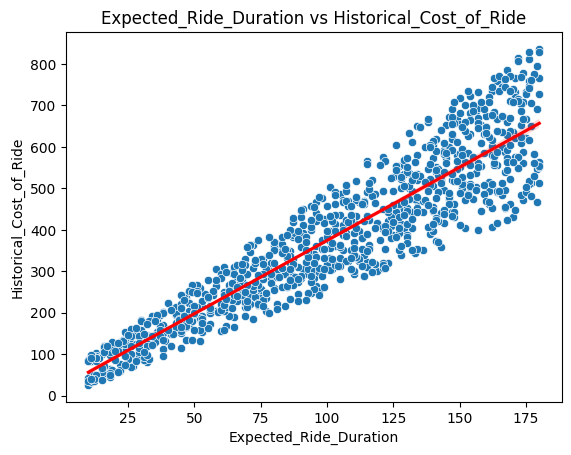

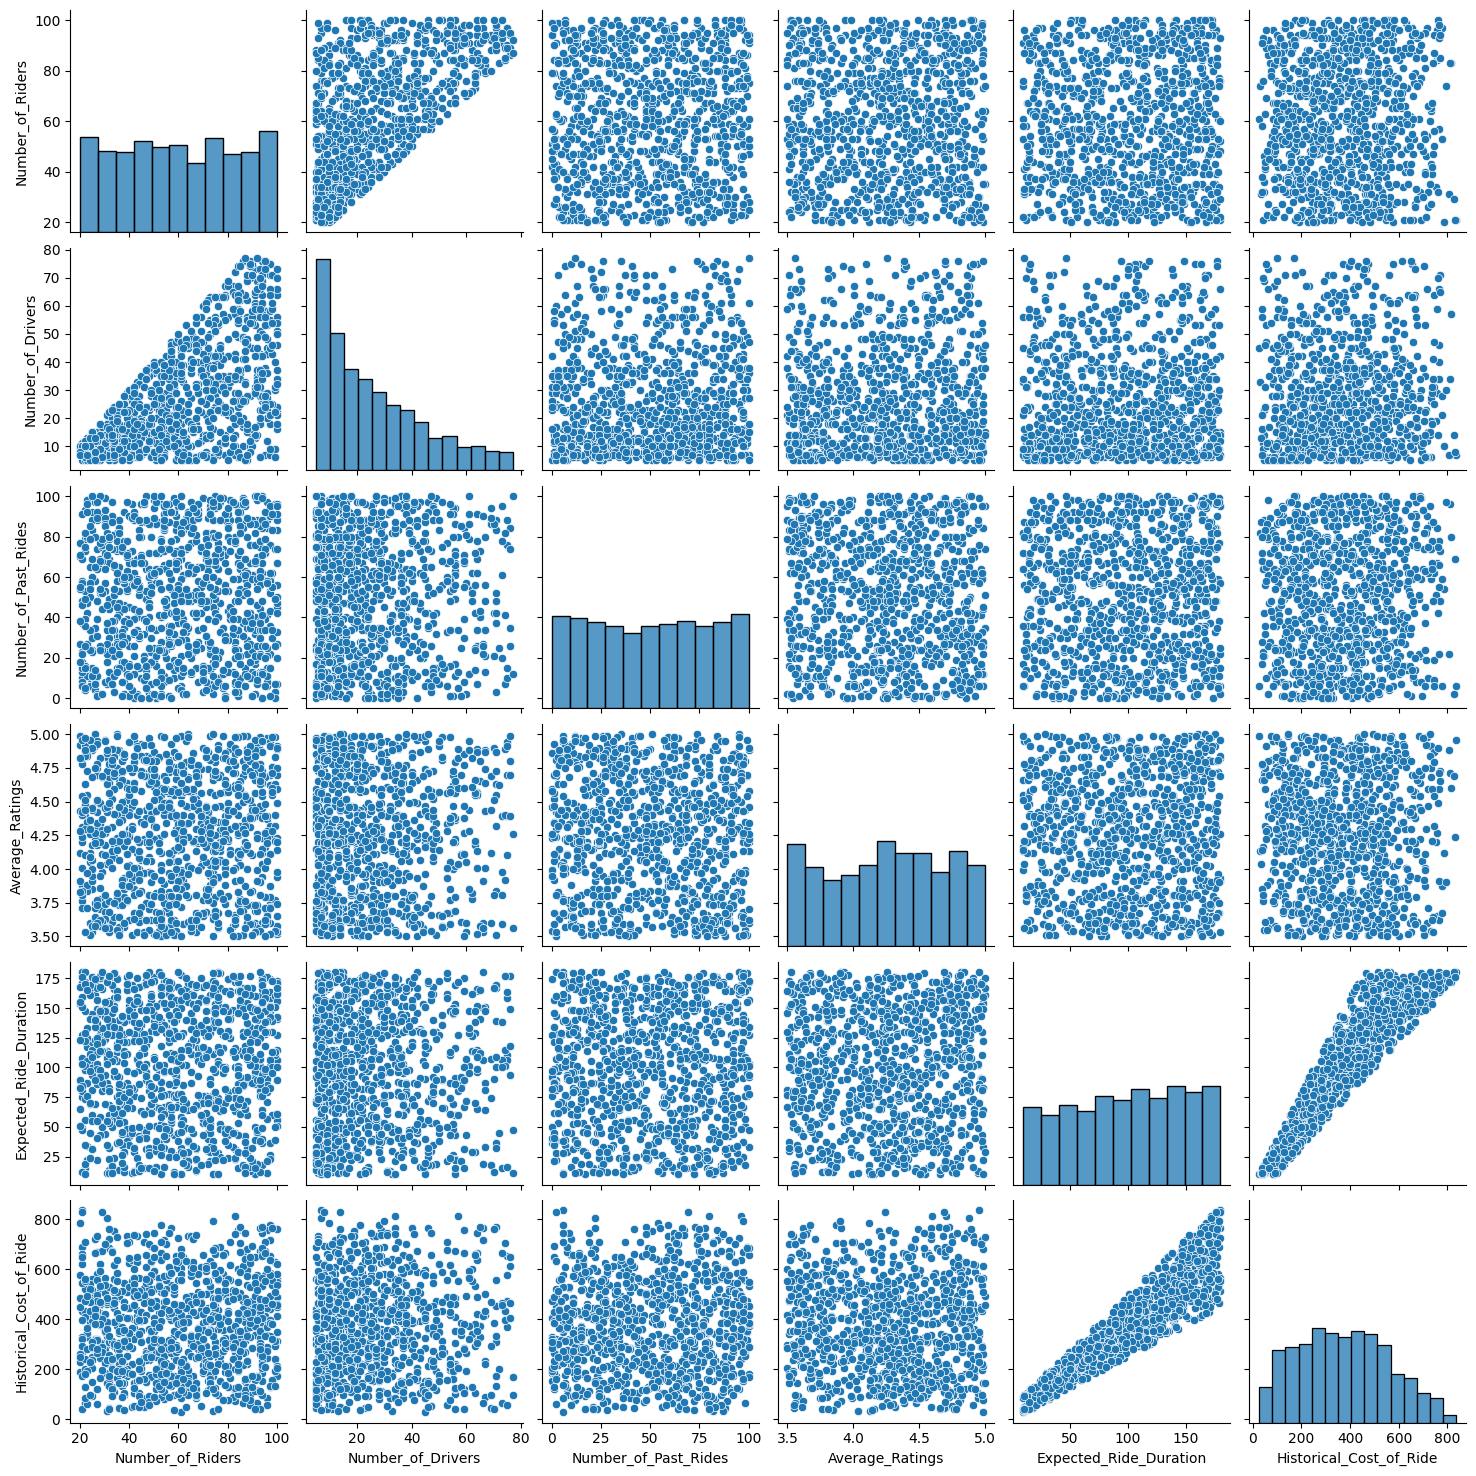

In [30]:
#linearity check using scatter and pairplot
numerical_features = [
    'Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides',
    'Average_Ratings', 'Expected_Ride_Duration'
]

target = 'Historical_Cost_of_Ride'

for feature in numerical_features:
    sns.scatterplot(x=feature, y=target, data=df_cleaned)
    sns.regplot(x=feature, y=target, data=df_cleaned, scatter=False, color='red')
    plt.title(f'{feature} vs {target}')
    plt.show()

sns.pairplot(df_cleaned[numerical_features + [target]])
plt.show()

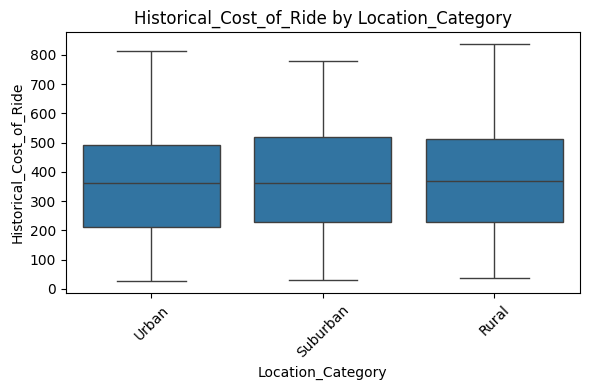

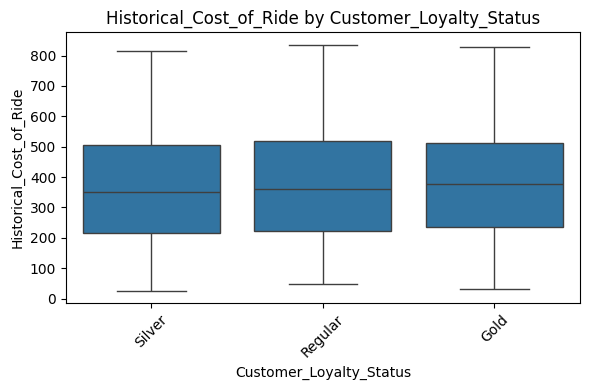

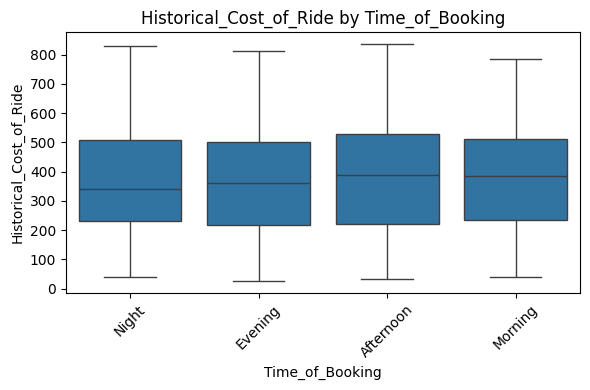

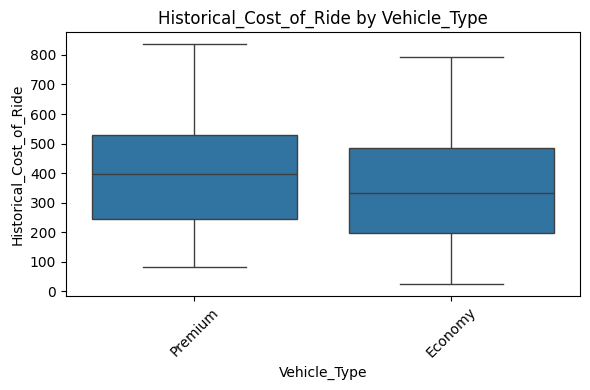

In [31]:
#checking outliers in categorical cols
categorical_features = ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']

for cat in categorical_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=cat, y=target, data=df_cleaned)
    plt.title(f'{target} by {cat}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [32]:
#encoding the categorical cols 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_cols = ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']

for col in categorical_cols:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

print(df_cleaned.head())

   Number_of_Riders  Number_of_Drivers  Location_Category  \
0                90                 45                  2   
1                58                 39                  1   
2                42                 31                  0   
3                89                 28                  0   
4                78                 22                  0   

   Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                        2                    13             4.47   
1                        2                    72             4.06   
2                        2                     0             3.99   
3                        1                    67             4.31   
4                        1                    74             3.77   

   Time_of_Booking  Vehicle_Type  Expected_Ride_Duration  \
0                3             1                      90   
1                1             0                      43   
2                0             1      

C:\Users\KIIT\AppData\Local\Temp\ipykernel_34680\3874995156.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = le.fit_transform(df_cleaned[col])
C:\Users\KIIT\AppData\Local\Temp\ipykernel_34680\3874995156.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = le.fit_transform(df_cleaned[col])
C:\Users\KIIT\AppData\Local\Temp\ipykernel_34680\3874995156.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [33]:
#filling the null values of numerical cols with median and categorical cols with mode 
for col in df_cleaned.columns:
    if df_cleaned[col].dtype in ['int64', 'float64']:  
        df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)
    else:  
        df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_34680\140456944.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_34680\140456944.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col].fillna(df_cleaned[col].median(), inplace=Tru

In [34]:
#to check the null values of the cleaned dataset
print(df_cleaned.isnull().sum())

Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64


**Seasonality check:**

In [35]:
#comapring prices acc. to data groups(segmentation) to see if price varies by customer type or time
print(df_cleaned.groupby("Customer_Loyalty_Status")["Historical_Cost_of_Ride"].mean())
print(df_cleaned.groupby("Time_of_Booking")["Historical_Cost_of_Ride"].mean())

Customer_Loyalty_Status
0    377.075124
1    381.380262
2    363.721037
Name: Historical_Cost_of_Ride, dtype: float64
Time_of_Booking
0    382.105626
1    364.680890
2    379.902884
3    367.635077
Name: Historical_Cost_of_Ride, dtype: float64


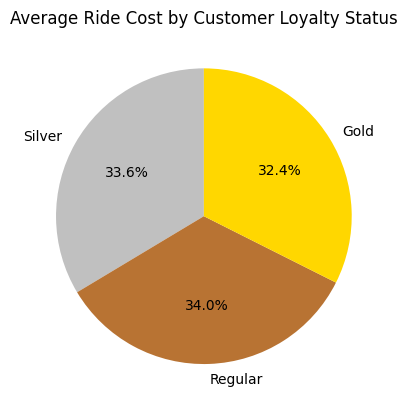

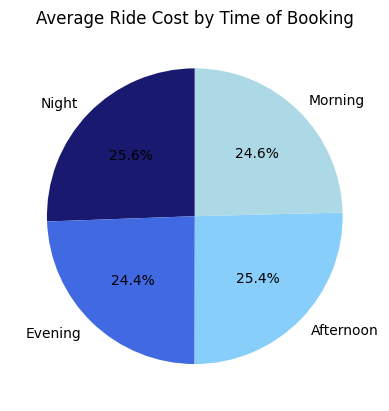

In [36]:
#visualization based on avg price with reference to customer loyal status and time of booking
loyalty_avg = df_cleaned.groupby("Customer_Loyalty_Status")["Historical_Cost_of_Ride"].mean()

colors_loyalty = ["#C0C0C0", "#B87333", "#FFD700"]  

plt.pie(
    loyalty_avg,
    labels=["Silver", "Regular", "Gold"],
    autopct="%1.1f%%",
    startangle=90,
    colors=colors_loyalty
)
plt.title("Average Ride Cost by Customer Loyalty Status")
plt.show()

time_avg = df_cleaned.groupby("Time_of_Booking")["Historical_Cost_of_Ride"].mean()

colors_time = ["#191970", "#4169E1", "#87CEFA", "#ADD8E6"]  

plt.pie(
    time_avg,
    labels=["Night", "Evening", "Afternoon", "Morning"],
    autopct="%1.1f%%",
    startangle=90,
    colors=colors_time
)
plt.title("Average Ride Cost by Time of Booking")
plt.show()

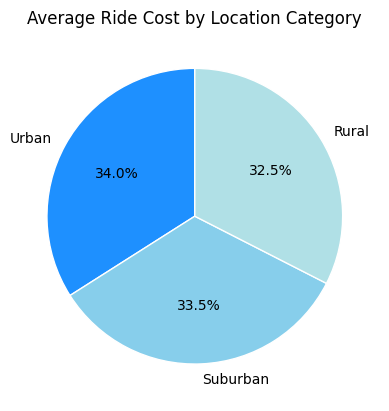

In [37]:
#visualization based on avg price with reference to location
location_avg = df_cleaned.groupby("Location_Category")["Historical_Cost_of_Ride"].mean()

colors = ["#1E90FF", "#87CEEB", "#B0E0E6"] 

plt.pie(
    location_avg,
    labels=["Urban", "Suburban", "Rural"],
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)
plt.title("Average Ride Cost by Location Category")
plt.show()

In [38]:
#saving the cleaned data seperately to the local folder 
df_cleaned.to_csv("cleaned_csv_data.csv", index=False)

print("Cleaned data saved as 'cleaned_csv_data.csv'")

Cleaned data saved as 'cleaned_csv_data.csv'


# **Milestone 2: Data Ingestion Pipeline**

**Objective:**
Build of a daily data ingestion workflow.

In [39]:
#data ingestion pipeline using pandas, checked for both raw and processed data
#raw data stored in input file path and processed data in the output file
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import os

INPUT_FILE = "dynamic_pricing.csv"
OUTPUT_FILE = "cleaned_csv_data.csv"

def load_data(file_path):
    df = pd.read_csv(file_path)
    print("Data loaded. Shape:", df.shape)
    return df

def clean_data(df):
    numeric_cols = df.select_dtypes(include="number").columns
    cat_cols = df.select_dtypes(include="object").columns

    df = df.dropna()

    for col in numeric_cols:
        Q1, Q3 = df[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]

    df = df.drop_duplicates()

    for col in cat_cols:
        df[col] = LabelEncoder().fit_transform(df[col])

    print("Data cleaned successfully")
    print("Final shape after cleaning:", df.shape)
    return df

def save_data(df, output_file):
    df.to_csv(output_file, index=False)
    print(f"Cleaned data saved to: {output_file}")

def run_pipeline():
    df_raw = load_data(INPUT_FILE)
    df_cleaned = clean_data(df_raw)
    save_data(df_cleaned, OUTPUT_FILE)
    print("Pipeline completed successfully.")
    return df_cleaned

if __name__ == "__main__":
    df_cleaned = run_pipeline()

Data loaded. Shape: (1000, 10)
Data cleaned successfully
Final shape after cleaning: (990, 10)
Cleaned data saved to: cleaned_csv_data.csv
Pipeline completed successfully.


**Defining KPIs:**

In [40]:
#KPIs for Revenue lift, Profit Margin, Conversion Rate, reflecting the outcome of the dynamic pricing model 
df = pd.read_csv("cleaned_csv_data.csv")

df['revenue'] = df['Historical_Cost_of_Ride']

df['profit'] = df['revenue'] * 0.3
df['profit_margin'] = (df['profit'] / df['revenue']) * 100

df['conversion_rate'] = (df['Customer_Loyalty_Status'] / df['Customer_Loyalty_Status'].max()) * 100

baseline_revenue = df['revenue'].iloc[0]
df['revenue_lift_pct'] = ((df['revenue'] - baseline_revenue) / baseline_revenue) * 100

kpi_summary = df[['revenue', 'profit_margin', 'conversion_rate', 'revenue_lift_pct']]
print(kpi_summary.head())

      revenue  profit_margin  conversion_rate  revenue_lift_pct
0  284.257273           30.0            100.0          0.000000
1  173.874753           30.0            100.0        -38.831907
2  329.795469           30.0            100.0         16.020064
3  470.201232           30.0             50.0         65.413967
4  579.681422           30.0             50.0        103.928440


# **Milestone 4: Baseline Price Engine**

**Objective:**
Creating a rule-based engine for initial comparison
(Time-based and inventory-based pricing rules)


Revenue Difference vs Historical: -33.71%

Baseline pricing saved to: data/baseline_output\baseline_pricing_output.csv


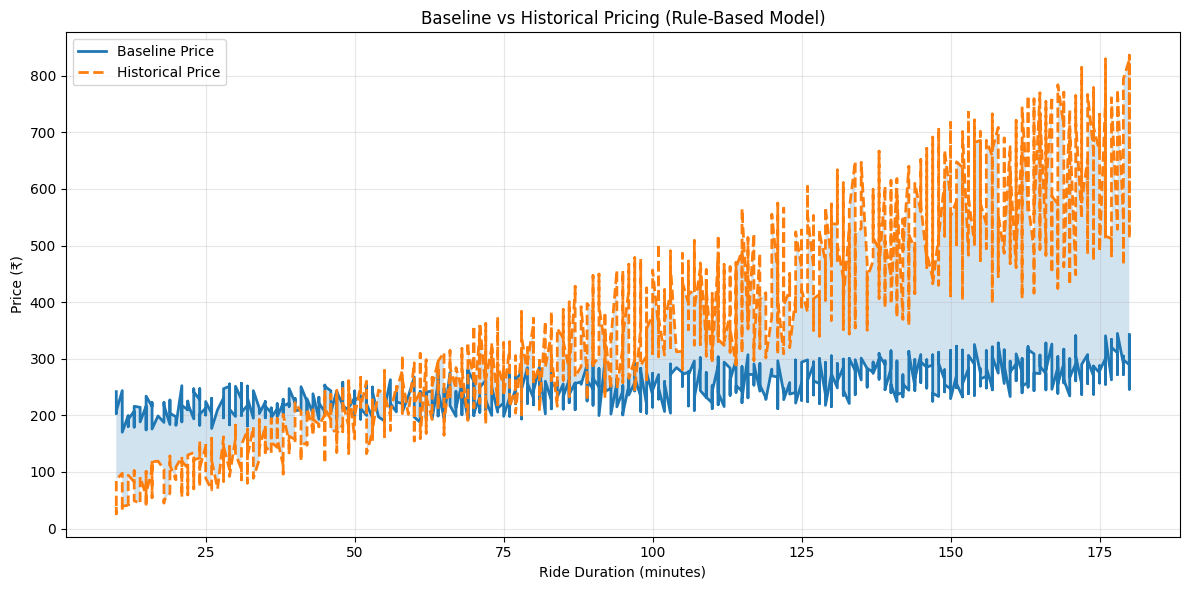

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Loaded the cleaned data
df = pd.read_csv(os.path.join("data", "cleaned", "cleaned_csv_data.csv"))

# Static Price (for comparison)
df["static_price"] = 200

# Baseline Pricing Model Using Real Features
df["duration_factor"] = df["Expected_Ride_Duration"] * 0.5  # ₹0.5 per min
df["loyalty_factor"] = 1 - (df["Customer_Loyalty_Status"] * 0.05)  # loyalty discount
df["past_rides_factor"] = 1 - (df["Number_of_Past_Rides"] * 0.001)  # bulk discount
df["location_factor"] = 1 + (df["Location_Category"] * 0.1)  # surge in premium areas

df["baseline_price"] = (
    df["static_price"]
    + df["duration_factor"]
) * df["loyalty_factor"] * df["past_rides_factor"] * df["location_factor"]

# KPI: Revenue Comparison
df["historical_price"] = df["Historical_Cost_of_Ride"]
df["baseline_revenue"] = df["baseline_price"]
df["historical_revenue"] = df["historical_price"]

baseline_rev = df["baseline_revenue"].sum()
historical_rev = df["historical_revenue"].sum()

revenue_lift = ((baseline_rev - historical_rev) / historical_rev) * 100
print(f"\nRevenue Difference vs Historical: {revenue_lift:.2f}%\n")

# Save Output
output_dir = "data/baseline_output"
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, "baseline_pricing_output.csv")
df.to_csv(output_path, index=False)
print(f"Baseline pricing saved to: {output_path}")

# Plot: Baseline vs Historical Pricing Over Duration
df_sorted = df.sort_values("Expected_Ride_Duration")

plt.figure(figsize=(12, 6))
plt.plot(df_sorted["Expected_Ride_Duration"], df_sorted["baseline_price"],
         linewidth=2, label="Baseline Price")
plt.plot(df_sorted["Expected_Ride_Duration"], df_sorted["historical_price"],
         linewidth=2, linestyle="--", label="Historical Price")

plt.fill_between(df_sorted["Expected_Ride_Duration"],
                 df_sorted["baseline_price"],
                 df_sorted["historical_price"],
                 alpha=0.2)

plt.title("Baseline vs Historical Pricing (Rule-Based Model)")
plt.xlabel("Ride Duration (minutes)")
plt.ylabel("Price (₹)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
